## Observations and Insights 

%matplotlib inline

In [224]:
# Dependencies and Setup
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
import pandas as pd

In [225]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"

In [226]:
# Study data files
study_results_path = "data/Study_results.csv"

In [227]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [228]:
# Read the mouse data and the study results
study_results = pd.read_csv(study_results_path)
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [229]:
# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [230]:
# Checking the number of mice.
mouse_count = mouse_data["Mouse ID"].value_counts()
number_of_mice = len(mouse_count)
number_of_mice

249

In [231]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicates = mouse_data["Mouse ID"].count()
mouse_duplicates

1893

In [275]:
mouse_duplicate = mouse_data.duplicated(subset = ["Mouse ID", "Timepoint"])
mouse_duplicate
mouse_duplicate = mouse_data.loc[mouse_duplicate]
mouse_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [281]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_clean_dr = mouse_data.loc[mouse_data["Mouse ID"] != "g989"]
len(mouse_data_clean_dr)

1880

In [282]:
# Checking the number of mice in the clean DataFrame.
len(mouse_data_clean_dr["Mouse ID"].unique())

248

## Summary Statistics

In [283]:
#????Why are all values the same???
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [284]:
mouse_data_clean_dr = mouse_data.groupby('Drug Regimen')
mouse_data_clean_dr.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [236]:
mouse_data_clean_dr_mean = mouse_data_clean_dr["Tumor Volume (mm3)"].mean()
mouse_data_clean_dr_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [237]:
mouse_data_clean_dr_median = mouse_data_clean_dr['Tumor Volume (mm3)'].median()
mouse_data_clean_dr_median 

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [238]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mouse_data_clean_dr_var = mouse_data_clean_dr['Tumor Volume (mm3)'].var()
mouse_data_clean_dr_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [239]:
mouse_data_clean_dr_std = mouse_data_clean_dr['Tumor Volume (mm3)'].var()
mouse_data_clean_dr_std

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [240]:
mouse_data_clean_dr_sem = mouse_data_clean_dr.sem()['Tumor Volume (mm3)']
mouse_data_clean_dr_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [241]:
# Assemble the resulting series into a single summary dataframe.
mouse_data_clean_dr_df = pd.DataFrame({
    "Mean": mouse_data_clean_dr_mean, 
    "Median": mouse_data_clean_dr_median,
    "Variance": mouse_data_clean_dr_var,
    "Standard Deviation": mouse_data_clean_dr_std,
    "SEM": mouse_data_clean_dr_sem
    
})
mouse_data_clean_dr_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,24.947764,0.329346
Ceftamin,52.591172,51.776157,39.290177,39.290177,0.469821
Infubinol,52.884795,51.820584,43.128684,43.128684,0.492236
Ketapril,55.235638,53.698743,68.553577,68.553577,0.603860
Naftisol,54.331565,52.509285,66.173479,66.173479,0.596466
Placebo,54.033581,52.288934,61.168083,61.168083,0.581331
Propriva,52.322552,50.854632,42.351070,42.351070,0.512884
Ramicane,40.216745,40.673236,23.486704,23.486704,0.320955
Stelasyn,54.233149,52.431737,59.450562,59.450562,0.573111


In [242]:
#???What is the aggregation method???
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [243]:
#???What is this error??? 
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen = mouse_data.groupby("Drug Regimen")
drug_regimen.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [244]:
# Total number of timepoints per regimen
drug_regimen_df = drug_regimen.count()
drug_regimen_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [245]:
# Make it a dataframe
drug_regimen_df_bar = pd.DataFrame(drug_regimen_df)
drug_regimen_df_bar

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [246]:
# Just pull two columns needed
drug_regimen_df_bar = drug_regimen_df_bar.columns[1:6]
drug_regimen_df_bar

Index(['Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)'], dtype='object')

TypeError: 'str' object is not callable

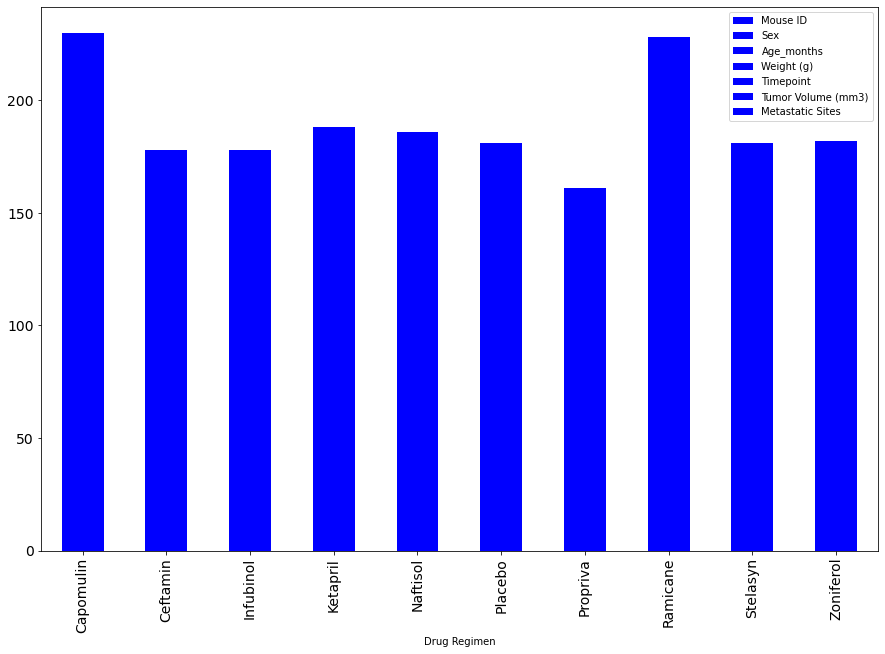

In [247]:
#????? How to get rid of key????
drug_regimen_df.plot.bar(figsize=(15,10), color='b',fontsize = 14)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Timepoint",fontsize = 14)
plt.title("Number of Timepoints per Treatment",fontsize = 20)

plt.tight_layout()
plt.show()

In [ ]:
#come back and put labels******************
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y_axis = drug_regimen_df["Timepoint"]
plt.bar(drug_regimen_df.index.values, y_axis, color="b", align="center")
plt.xticks(rotation = 90)
plt.show()


In [248]:
# Split up our data into groups based upon 'mouse id' and 'gender'
mouse_groups = mouse_data.groupby(['Mouse ID','Sex'])
mouse_groups.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,0,45.000000,0
1884,z969,Naftisol,Male,9,30,5,49.332999,0
1885,z969,Naftisol,Male,9,30,10,52.656081,1
1886,z969,Naftisol,Male,9,30,15,54.713005,2


In [249]:
# Create a new variable that holds the sum of our groups
sum_gender = mouse_groups.size()
sum_gender.head()

Mouse ID  Sex   
a203      Female    10
a251      Female    10
a262      Female    10
a275      Female    10
a366      Female     7
dtype: int64

In [250]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

In [251]:
#group by gender
mouse_gender = pd.DataFrame(sum_gender.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

TypeError: 'str' object is not callable

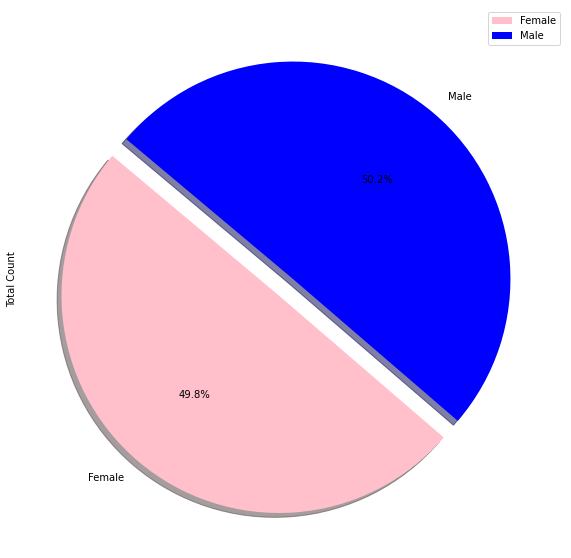

In [252]:
colors = ['pink', 'blue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(15,10), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.axis('equal')

plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male"]
sizes = [49.799197,50.200803]
colors = ['pink', 'blue']
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.axis('equal')

plt.show()

## Quartiles, Outliers and Boxplots

In [253]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin
Capomulin = mouse_data.loc[mouse_data["Drug Regimen"] == "Capomulin"]
Capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [254]:
# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin.groupby('Mouse ID').max()['Timepoint']
Capomulin_last

Mouse ID
b128    45
b742    45
f966    20
g288    45
g316    45
i557    45
i738    45
j119    45
j246    35
l509    45
l897    45
m601    45
m957    45
r157    15
r554    45
r944    45
s185    45
s710    45
t565    45
u364    45
v923    45
w150    10
w914    45
x401    45
y793    45
Name: Timepoint, dtype: int64

In [255]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_merge = pd.merge(Capomulin_last, mouse_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [256]:
Capomulin_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [257]:
# Ramicane
Ramicane = mouse_data.loc[mouse_data["Drug Regimen"] == "Ramicane",:]
Ramicane
Ramicane_last = Ramicane.groupby('Mouse ID').max()['Timepoint']
Ramicane_last

Mouse ID
a411    45
a444    45
a520    45
a644    45
c458    30
c758    45
d251    45
e662    45
g791    45
i177    45
i334    45
j913    45
j989    45
k403    45
m546    45
n364    45
q597    45
q610    35
r811    45
r921    30
s508    45
u196    45
w678     5
y449    15
z578    45
Name: Timepoint, dtype: int64

In [258]:
Ramicane_merge = pd.merge(Ramicane_last, mouse_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [259]:
# Infubinol
Infubinol = mouse_data.loc[mouse_data["Drug Regimen"] == "Infubinol", :]
Infubinol
Infubinol_last = Capomulin.groupby('Mouse ID').max()['Timepoint']
Infubinol_last

Mouse ID
b128    45
b742    45
f966    20
g288    45
g316    45
i557    45
i738    45
j119    45
j246    35
l509    45
l897    45
m601    45
m957    45
r157    15
r554    45
r944    45
s185    45
s710    45
t565    45
u364    45
v923    45
w150    10
w914    45
x401    45
y793    45
Name: Timepoint, dtype: int64

In [260]:
Infubinol_merge = pd.merge(Infubinol_last, mouse_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [261]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Ceftamin
Ceftamin = mouse_data.loc[mouse_data["Drug Regimen"] == "Ceftamin",:]
Ceftamin

Ceftamin_last = Ceftamin.groupby('Mouse ID').max()['Timepoint']
Ceftamin_last

Mouse ID
a275    45
b447     0
b487    25
b759    30
f436    15
h531     5
j296    45
k210    45
l471    45
l490    30
l558    10
l661    45
l733    45
o287    45
p438    45
q483    40
t573     0
u149    25
u153     0
w151    45
x226     0
x581    45
x822    45
y769    45
y865    45
Name: Timepoint, dtype: int64

In [262]:
Ceftamin_merge = pd.merge(Ceftamin_last, mouse_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [263]:
# Put treatments into a list for for loop (and later for plot labels)
Ceftamin_plot = pd.DataFrame(Ceftamin_merge[["Mouse ID","Tumor Volume (mm3)"]])
Ceftamin_plot

,Mouse ID,Tumor Volume (mm3)
0,a275,62.999356
1,b447,45.000000
2,b487,56.057749
3,b759,55.742829
4,f436,48.722078
5,h531,47.784682
6,j296,61.849023
7,k210,68.923185
8,l471,67.748662
9,l490,57.918381


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff920162fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff91830a880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff948831340>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff91830a8e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff94880f310>,
 'means': []}

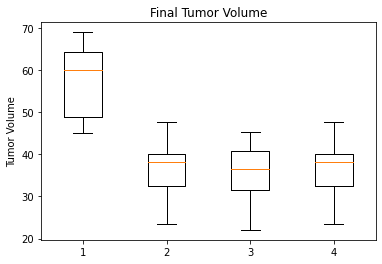

In [264]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [Ceftamin_merge["Tumor Volume (mm3)"],Infubinol_merge["Tumor Volume (mm3)"],
       Ramicane_merge["Tumor Volume (mm3)"], Capomulin_merge["Tumor Volume (mm3)"]]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(data)



In [265]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = Capomulin_merge["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumors is: {lowerq}")
print(f"The upper quartile of Capomulin tumors is: {upperq}")
print(f"The interquartile range of Capomulin tumors is: {iqr}")
print(f"The the median of Capomulin tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



    

The lower quartile of Capomulin tumors is: 32.37735684
The upper quartile of Capomulin tumors is: 40.1592203
The interquartile range of Capomulin tumors is: 7.781863460000004
The the median of Capomulin tumors is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [266]:
quartiles = Ceftamin_merge["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumors is: {lowerq}")
print(f"The upper quartile of Capomulin tumors is: {upperq}")
print(f"The interquartile range of Capomulin tumors is: {iqr}")
print(f"The the median of Capomulin tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors is: 48.72207785
The upper quartile of Capomulin tumors is: 64.29983003
The interquartile range of Capomulin tumors is: 15.577752179999997
The the median of Capomulin tumors is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [285]:
quartiles = Ramicane_merge["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumors is: {lowerq}")
print(f"The upper quartile of Capomulin tumors is: {upperq}")
print(f"The interquartile range of Capomulin tumors is: {iqr}")
print(f"The the median of Capomulin tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors is: 31.56046955
The upper quartile of Capomulin tumors is: 40.65900627
The interquartile range of Capomulin tumors is: 9.098536719999998
The the median of Capomulin tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [286]:
quartiles = Infubinol_merge["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumors is: {lowerq}")
print(f"The upper quartile of Capomulin tumors is: {upperq}")
print(f"The interquartile range of Capomulin tumors is: {iqr}")
print(f"The the median of Capomulin tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors is: 32.37735684
The upper quartile of Capomulin tumors is: 40.1592203
The interquartile range of Capomulin tumors is: 7.781863460000004
The the median of Capomulin tumors is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


## Line and Scatter Plots

In [290]:
#?????????????????????????
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
print(mouse_data["Drug Regimen"].value_counts())
capomulin_df=mouse_data_clean_dr.loc[mouse_data_clean_dr["Drug Regimen"=='Capomulin']]
print(Capomulin.head())
mouse = Capomulin.loc[Capomulin["Mouse ID"=="b128"]]
print(mouse)
x_axis = mouse["Timepoint"]
y_axis = mouse["Tumor Volume (mm3)"]
plt.xlabel = ("Timepoint")
plt.ylabel = ("Tumor Volume (mm3)")
plt.title = ("Tumor Volume vs. Time Point")
plt.plot(x_axis, y_axis)
plt.show

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64


AttributeError: 'DataFrameGroupBy' object has no attribute 'loc'

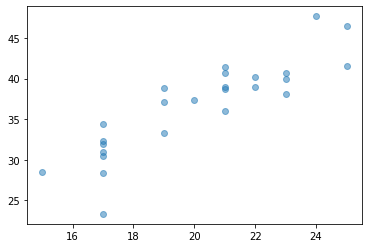

In [269]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_axis = Capomulin_merge["Weight (g)"]
y_axis = Capomulin_merge["Tumor Volume (mm3)"]
plt.xlabel = ("Weight (g)")
plt.ylabel = ("Tumor Volume (mm3)")
plt.scatter(x_axis, y_axis, alpha=0.5)
plt.show()


## Correlation and Regression

In [155]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(Capomulin_merge["Weight (g)"],Capomulin_merge["Tumor Volume (mm3)"])
correlation
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.88


TypeError: 'str' object is not callable

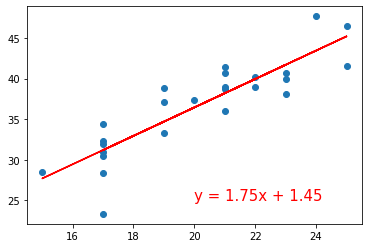

In [162]:
x_values = Capomulin_merge["Weight (g)"]
y_values = Capomulin_merge["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()